In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 44631.70it/s]


[0, 2, 19, 20, 24, 20, 27, 25, 27, 29, 29, 32, 34, 33, 37, 36, 35, 35, 38, 41, 41, 42, 42, 39, 42, 48, 49, 46, 55, 60, 55, 62, 56, 63, 71, 71, 71, 69, 67, 80, 76, 74, 84, 89, 85, 90, 97, 97, 99, 99, 103, 105, 119, 118, 121, 702, 728, 707, 705, 695, 704, 706, 676, 707, 682, 699, 677, 670, 684, 655, 674, 670, 664, 670, 660, 669, 646, 643, 651, 670, 632, 642, 652, 629, 625, 631, 602, 629, 634, 620, 620, 630, 632, 634, 631, 616, 631, 618, 623, 636, 616, 643, 626, 619, 618, 612, 608, 602, 601, 771]


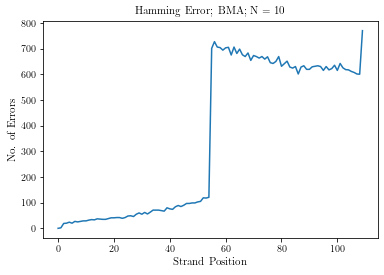

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 10', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov10-sab-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:01<00:00, 8078.23it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


 -> TC 6
AG ->  6
 -> TG 6
AT ->  7
GC ->  7
CT ->  8
 -> CA 8
 -> CC 10
A -> C 11
A -> G 12
TG ->  12
C -> G 19
C -> T 19
G -> C 27
G -> A 36
C -> A 57
T -> A 59
T -> C 69
T -> G 69
C ->  83
T ->  126
 -> G 235
 -> T 251
 -> C 263
 -> A 266
A ->  316
G ->  509


 -> CA @ 55 6
T ->  @ 109 6
A -> C @ 110 7
 -> C @ 52 7
C ->  @ 56 7
 -> C @ 109 7
 -> T @ 52 8
 -> T @ 57 8
G ->  @ 56 8
 -> A @ 1 8
A -> G @ 110 8
T ->  @ 56 9
 -> A @ 109 9
A ->  @ 55 9
 -> A @ 52 9
A ->  @ 56 10
 -> G @ 57 10
 -> C @ 57 12
 -> G @ 52 13
 -> A @ 57 13
C -> T @ 110 13
G ->  @ 55 15
C -> G @ 110 15
 -> C @ 53 24
 -> G @ 53 25
 -> A @ 53 27
 -> T @ 53 30
C -> A @ 110 32
 -> G @ 56 32
C ->  @ 110 33
 -> A @ 56 35
T -> A @ 110 35
T -> C @ 110 40
T ->  @ 110 42
 -> T @ 56 45
 -> C @ 56 45
T -> G @ 110 47
 -> A @ 55 125
 -> G @ 55 129
 -> C @ 55 132
 -> T @ 55 140
A ->  @ 110 278
G ->  @ 110 427
[8, 14, 5, 6, 1, 2, 3, 2, 2, 2, 1, 0, 1, 1, 4, 5, 1, 1, 3, 4, 2, 2, 5, 0, 4, 3, 1, 1, 5, 2, 3, 3, 5, 4, 4, 7, 5, 7, 7, 7, 8, 8, 5, 9, 6, 4, 9, 9, 6, 10, 11, 18, 47, 121, 40, 615, 206, 61, 29, 26, 10, 8, 6, 12, 8, 8, 10, 12, 10, 8, 5, 7, 6, 6, 11, 5, 5, 9, 3, 7, 4, 6, 2, 1, 2, 5, 4, 2, 3, 3, 4, 3, 2, 1, 4, 1, 1, 1, 3, 0, 2, 2, 1, 1, 1, 5, 2, 3, 4, 35, 994]


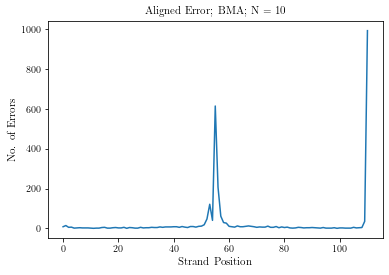

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 10', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov10-sab-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 15, 8, 4, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 427]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 9, 10, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 278]
[4, 8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 9, 27, 4, 125, 35, 13, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

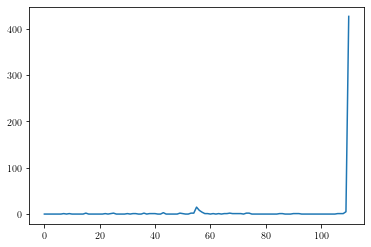

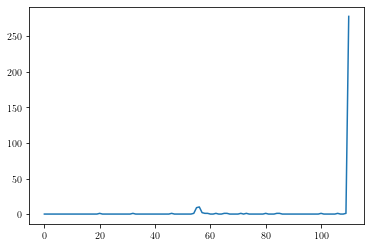

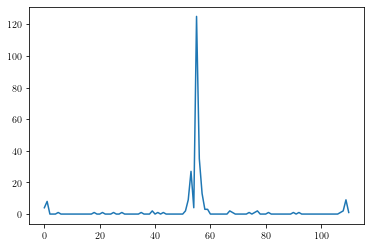

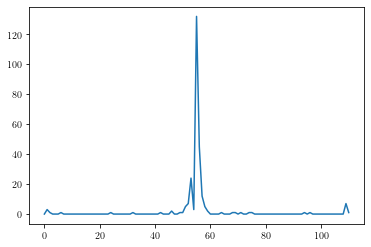

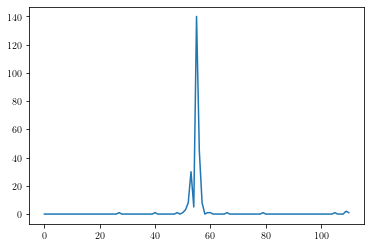

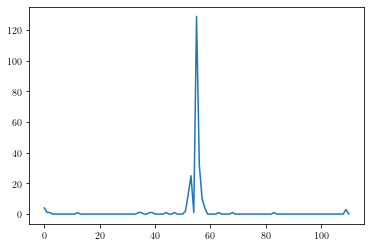

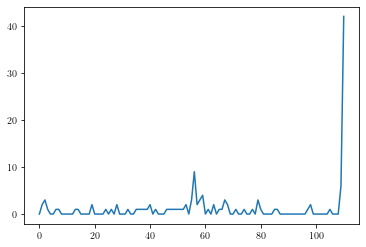

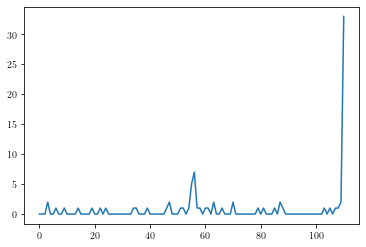

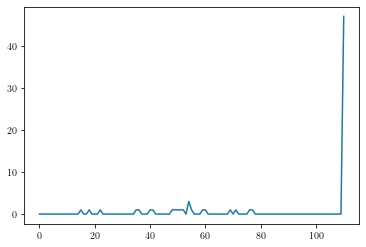

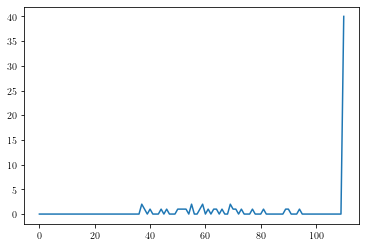

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)